In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset_root = 'dataset/'
scenario_type = 'changing_lane'

In [3]:
# load ouput file
with open(dataset_root + scenario_type + '/look_ahead_pt_array.npy', 'rb') as f:
    look_ahead_pt_array = np.load(f, allow_pickle=True)
    
look_ahead_pt_array.shape

(22, 3)

In [4]:
# load random input file
with open(dataset_root + scenario_type + '/observation_array.npy', 'rb') as f:
    observation = np.load(f, allow_pickle=True)
observation.shape

(22, 11, 8)

In [5]:
len(observation[0][0])

8

# visualize

In [6]:
# random_idx= random.choice(range(len(observation)))
random_idx = 0
frame = observation[random_idx]
look_ahead_pt = look_ahead_pt_array[random_idx]

In [7]:
ego_pose = frame[0]
objs_pose = frame[1:]
ego_pose

array([ 6.64767195e+05,  3.99943679e+06,  1.09162177e+00,  8.11178251e+00,
       -1.33688155e-01,  3.37024940e-01, -1.08500038e-01,  1.00000000e+00])

In [8]:
objs_pose[:,[0,1,2,3,4]]

array([[ 6.64761747e+05,  3.99943323e+06,  1.09510844e+00,
         4.36665833e+00,  8.50059369e+00],
       [ 6.64776172e+05,  3.99942780e+06,  2.97777443e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 6.64758350e+05,  3.99944652e+06, -2.02188406e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 6.64773195e+05,  3.99942472e+06,  2.96728993e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 6.64771455e+05,  3.99942156e+06,  2.99077960e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 6.64759945e+05,  3.99942263e+06,  1.09971153e+00,
         4.03204946e+00,  7.92566173e+00],
       [ 6.64775063e+05,  3.99945134e+06,  1.10133993e+00,
         4.03520058e+00,  7.94133281e+00],
       [ 6.64772514e+05,  3.99941795e+06,  2.99442928e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 6.64781733e+05,  3.99942365e+06,  2.97406492e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 6.64779695e+05,  3.99942075e+06,  2.97068932e+00,
         0.00000000e+00

In [9]:
look_ahead_pt

array([6.64788893e+05, 3.99947749e+06, 1.02525629e+01])

In [10]:
ego_pose[4]

-0.1336881549248966

**!!!ego vx and vy are w.r.t ego coordinate**

In [11]:
ego_vx = ego_pose[3]*np.cos(ego_pose[2]) - ego_pose[4]*np.sin(ego_pose[2])
ego_vy = ego_pose[3]*np.sin(ego_pose[2]) + ego_pose[4]*np.cos(ego_pose[2])

/home/gac/anaconda3/envs/nuplan/lib/python3.9/site-packages/matplotlib/quiver.py:646: RuntimeWarning: divide by zero encountered in scalar divide
  length = a * (widthu_per_lenu / (self.scale * self.width))
/home/gac/anaconda3/envs/nuplan/lib/python3.9/site-packages/matplotlib/quiver.py:646: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


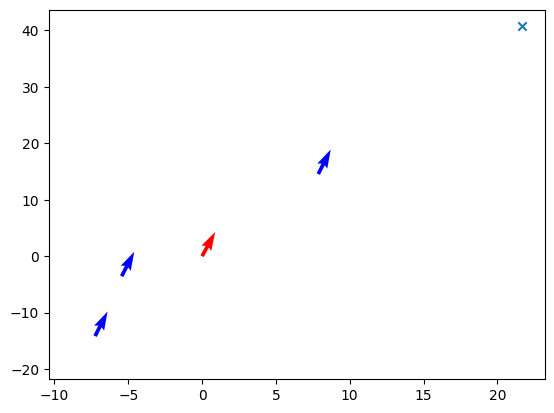

In [12]:
plt.quiver(0, 0, ego_vx, ego_vy, color='r')
plt.scatter(look_ahead_pt[0]-ego_pose[0], look_ahead_pt[1]-ego_pose[1], marker='x')

for obj in objs_pose:
    if obj[-1] == 0:
        continue
    plt.quiver(obj[0]-ego_pose[0], obj[1]-ego_pose[1], obj[3], obj[4], color='b')
    
plt.show()